In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import special
from scipy import linalg

The goal: compute the integral

$$\int_0 ^ {\infty} dr \exp \left\{wr^2 + (g_x \cos(\phi) + g_y\sin(\phi))r \right\}, $$

where

$$ \vec{g} = -i \alpha \vec{u} + \frac{V}{4}(\vec{u} - \vec{v}), $$
$$w = i\left(\frac{\alpha}{2} + \lambda \right) + \frac{V}{4}$$
$$\lambda = \frac{\omega \Omega}{2} \cot(\Omega t_2)$$
$$\Omega = \frac{1-i}{2}\sqrt{\frac{q}{\omega}} $$
$$\alpha = \frac{\omega}{t_2},$$
$$V = -\frac{q}{12}(z^2 + (1-z)^2) t_2,$$
$$\omega = Ez(1-z)$$

After a few manipulations, this integral can be transformed to:

$$\exp\left\{-\frac{i}{2} \frac{(\alpha \vec{u}\cdot \vec{n})^2}{\alpha + 2\beta}\right\} 
\int _{-\frac{\alpha \vec{u}\cdot \vec{n}}{\alpha + 2\beta}}^{\infty} 
\mathrm{d}x \ f(x) \exp\left\{i \left[\frac{\alpha}{2} + \beta\right]x^2\right\},
$$

where 

$$f(x) = \exp\left\{\left(\frac{V}{4} - \gamma \right) r(x)^2 + \frac{V}{4}(\vec{u} - \vec{v})\cdot \vec{n} \ r(x) \right\}, $$
$$(\beta, \gamma) = (\mathrm{Re}, \ \mathrm{Im})\lambda, $$
$$r(x) = x + \frac{\alpha \vec{u}\cdot \vec{n}}{\alpha + 2\beta},$$
$$\vec{n} = (\cos \phi, \sin \phi) $$

In [3]:
#parameter set-up
fm = 5.067 
E = 500 * fm #E in GeV
z = 0.5
omega = E * z * (1 - z)
qF = 1.5 * fm ** 2
Omega = (1-1j) / 2 * np.sqrt(qF/omega)

#functions set up
def alpha(t2):

    return omega/t2

def V(t2):

    return -qF/12 * (z**2 + (1-z**2)) * t2 

def lambd(t2):

    return omega * Omega / 2 * 1 / np.tan(Omega * t2)

def w(t2):

    return 1j * (alpha(t2)/2 + lambd(t2))  + V(t2) / 4

def g(ux, uy, vx, vy, t2):

    return -1j * alpha(t2) * np.array([ux, uy]) + V(t2) / 4 * np.array([ux - vx, uy - vy])

def beta(t2):

    return np.real(lambd(t2))

def gamma(t2):

    return np.imag(lambd(t2))

def r_x(t2, ux, uy, theta, x):

    scalp = ux*np.cos(theta) + uy * np.sin(theta)


    return x + alpha(t2) * scalp / (alpha(t2) + beta(t2))

def integr_r(ux, uy, vx, vy, t2, theta, r):
    g_vec = g(ux, uy, vx, vy, t2)
    phase = w(t2) * r**2 + r * (g_vec[0] * np.cos(theta) + g_vec[1] * np.sin(theta))

    return np.exp(phase)

def f_x(ux, uy, vx, vy, t2, theta, x):

    r = r_x(t2, ux, uy, theta, x)
    phase = (V(t2) / 4 - gamma(t2)) * r**2 + V(t2)/4 * (((ux-vx) * np.cos(theta) + (uy - vy) * np.sin(theta)) * r)

    return np.exp(phase)

def spat_freq(t2): 

    return alpha(t2)/2 + beta(t2)


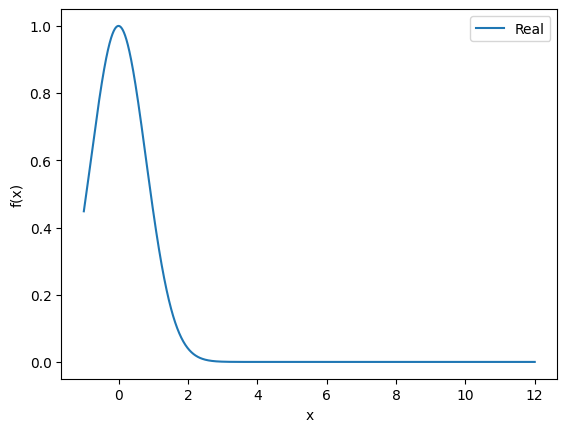

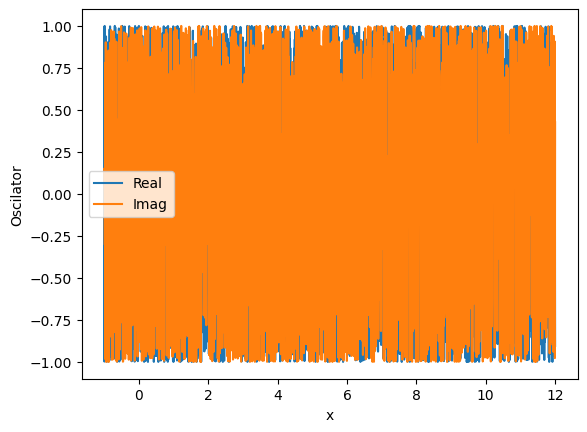

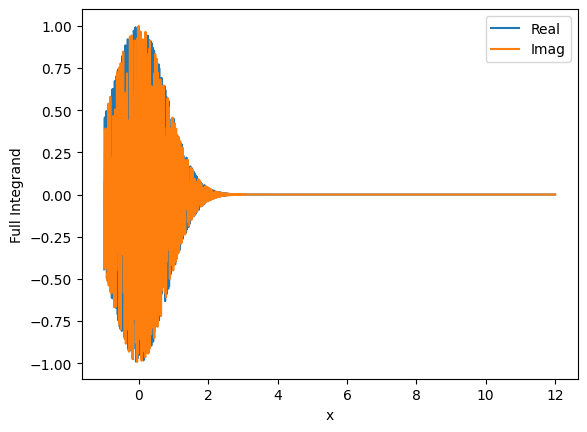

In [15]:
#Plot f(x) for u,v = 0, theta = pi/4, t2 = 0.01
T = 0.2
Xi = -1
R = np.linspace(Xi, 12, 2000)
Igrnd_R = .0 * R + 0j
for i_r in range(len(R)):
    Igrnd_R[i_r] = f_x(0, 0, 0, 0, T, np.pi/4, R[i_r])

plt.plot(R, np.real(Igrnd_R), label = "Real")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

plt.plot(R, np.real(np.exp(1j * spat_freq(T) * R**2)), label = "Real")
plt.plot(R, np.imag(np.exp(1j * spat_freq(T) * R**2)), label = "Imag")
plt.xlabel("x")
plt.ylabel("Oscilator")
plt.legend()
plt.show()

plt.plot(R, np.real(Igrnd_R) * np.real(np.exp(1j * spat_freq(0.01) * R**2)), label = "Real")
plt.plot(R, np.real(Igrnd_R) * np.imag(np.exp(1j * spat_freq(0.01) * R**2)), label = "Imag")
plt.xlabel("x")
plt.ylabel("Full Integrand")
plt.legend()
plt.show()

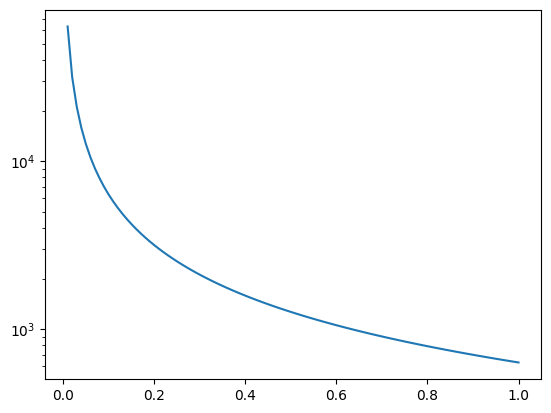

In [5]:
T_arr = np.linspace(0.01, 1, 100)

plt.plot(T_arr, spat_freq(T_arr))
plt.yscale("log")
plt.show()

In [6]:
A = np.random.rand(2000, 2000)

b = np.random.rand(2000)

In [7]:
linalg.solve(A, b)

array([-0.63842998, -0.84923197, -0.77220806, ...,  0.83433047,
        0.06686604,  0.09347378])